# Exploring dataset (a day)

Checking sensor data for a day (2020-02-14).

Normal range: HbA1c 5.2–5.6, Pre-diabetes range: HbA1c 5.7–6.4

## Gender & HbA1c

In [1]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
dg_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/Demographics.csv')
dg_df.head()

,ID,Gender,HbA1c
0,13,MALE,5.7
1,1,FEMALE,5.5
2,3,FEMALE,5.9
3,4,FEMALE,6.4
4,5,FEMALE,5.7


In [3]:
biological_sex = dg_df.loc[dg_df['ID'] == 1, 'Gender'].values[0]
hbA1c = dg_df.loc[dg_df['ID'] == 1, 'HbA1c'].values[0]

In [4]:
print(f'Biological Sex : {biological_sex}')
print(f'HbA1c : {hbA1c}')

Biological Sex : FEMALE
HbA1c : 5.5


## Food Log

In [5]:
fl001_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/001/Food_Log_001.csv')

In [6]:
fl001_df['date']=pd.to_datetime(fl001_df['date'])
fl001_df['time_begin']=pd.to_datetime(fl001_df['time_begin'])
fl001_df = fl001_df[(fl001_df['date'] >= '2020-02-14 00:00:00') & (fl001_df['date'] <= '2020-02-14 23:59:59')]

In [7]:
fl001_df.head(10)

,date,time,time_begin,time_end,logged_food,amount,unit,searched_food,calorie,total_carb,dietary_fiber,sugar,protein,total_fat
3,2020-02-14,07:10:00,2020-02-14 07:10:00,NaN,Natrel Lactose Free 2 Percent,8.00,fluid ounce,(Natrel) Lactose Free 2% Partly Skimmed Milk,120.0,9.0,NaN,8.0,12.0,NaN
4,2020-02-14,07:10:00,2020-02-14 07:10:00,NaN,Standard Breakfast,0.75,cup,"(Kellogg's) Frosted Flakes, Cereal",110.0,26.0,NaN,10.0,1.0,NaN
5,2020-02-14,09:38:00,2020-02-14 09:38:00,NaN,Breakfast Trail Mix,0.50,cup,"(Giant) Breakfast Blend, Trail Mix",280.0,30.0,NaN,22.0,4.0,NaN
6,2020-02-14,12:38:00,2020-02-14 12:38:00,NaN,Spinach Salad w/ strawberries and cheese,200.00,grams,Spinach And Strawberry Salad,286.0,14.0,NaN,8.5,7.6,NaN
7,2020-02-14,12:38:00,2020-02-14 12:38:00,NaN,Egg,1.00,NaN,Large Egg,72.0,0.4,NaN,0.2,6.3,NaN
8,2020-02-14,19:30:00,2020-02-14 19:30:00,NaN,Acai Smoothie,20.00,fluid ounce,(Smoothie King) Acai Adventure Smoothie,440.0,92.0,NaN,75.0,5.0,NaN
9,2020-02-14,20:00:00,2020-02-14 20:00:00,NaN,(Trader Joe's) Mac and Cheese,0.50,cup,(Trader Joe's) Macaroni and Cheese,135.0,23.5,NaN,1.5,5.0,NaN
10,2020-02-14,20:00:00,2020-02-14 20:00:00,NaN,Coconut Shrimp,5.00,NaN,Coconut Shrimp,317.0,30.0,NaN,0.1,11.0,NaN


In [8]:
calories2hr = 0.
protein2hr = 0.
sugar2hr = 0.
carbs2hr = 0.

for window_data in fl001_df.rolling(window='2H', on='time_begin'):
    calories2hr += window_data['calorie'].values.sum()
    protein2hr += window_data['protein'].values.sum()
    sugar2hr += window_data['sugar'].values.sum()
    carbs2hr += window_data['total_carb'].values.sum()


calories8hr = 0.
protein8hr = 0.
sugar8hr = 0.
carbs8hr = 0.

for window_data in fl001_df.rolling(window='8H', on='time_begin'):
    calories8hr += window_data['calorie'].values.sum()
    protein8hr += window_data['protein'].values.sum()
    sugar8hr += window_data['sugar'].values.sum()
    carbs8hr += window_data['total_carb'].values.sum()


calories24hr = 0.
protein24hr = 0.
sugar24hr = 0.
carbs24hr = 0.

for window_data in fl001_df.rolling(window='24H', on='time_begin'):
    calories24hr += window_data['calorie'].values.sum()
    protein24hr += window_data['protein'].values.sum()
    sugar24hr += window_data['sugar'].values.sum()
    carbs24hr += window_data['total_carb'].values.sum()

C:\Users\smyie\AppData\Local\Temp\ipykernel_16460\3700245159.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  for window_data in fl001_df.rolling(window='2H', on='time_begin'):
C:\Users\smyie\AppData\Local\Temp\ipykernel_16460\3700245159.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  for window_data in fl001_df.rolling(window='8H', on='time_begin'):
C:\Users\smyie\AppData\Local\Temp\ipykernel_16460\3700245159.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  for window_data in fl001_df.rolling(window='24H', on='time_begin'):


In [9]:
print(f'calories2hr : {calories2hr}')
print(f'protein2hr : {protein2hr}')
print(f'sugar2hr : {sugar2hr}')
print(f'carbs2hr : {carbs2hr}')

print(f'calories8hr : {calories8hr}')
print(f'protein8hr : {protein8hr}')
print(f'sugar8hr : {sugar8hr}')
print(f'carbs8hr : {carbs8hr}')

print(f'calories24hr : {calories24hr}')
print(f'protein24hr : {protein24hr}')
print(f'sugar24hr : {sugar24hr}')
print(f'carbs24hr : {carbs24hr}')

calories2hr : 3181.0
protein2hr : 86.5
sugar2hr : 293.29999999999995
carbs2hr : 455.4
calories8hr : 5505.0
protein8hr : 175.20000000000002
sugar8hr : 417.4
carbs8hr : 663.5999999999999
calories24hr : 7035.0
protein24hr : 226.20000000000002
sugar24hr : 537.4
carbs24hr : 858.5999999999999


## Dexcom

In [10]:
dexcom001_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/001/Dexcom_001.csv')

In [11]:
dexcom001_df.drop(dexcom001_df.loc[:11].index, inplace=True)
dexcom001_df.rename(columns = {'Timestamp (YYYY-MM-DDThh:mm:ss)': 'datetime'}, inplace = True)

In [12]:
dexcom001_df['datetime']=pd.to_datetime(dexcom001_df['datetime'])

<Axes: xlabel='datetime'>

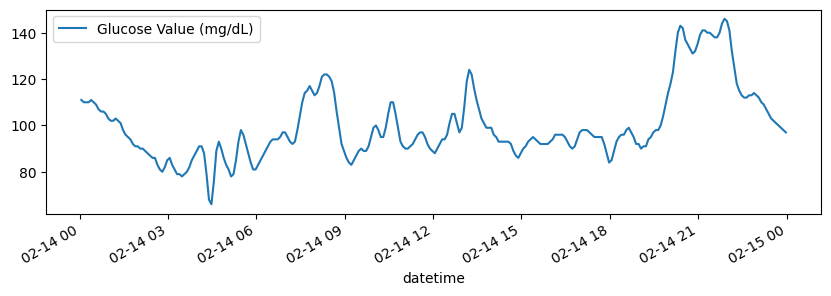

In [13]:
dexcom001_df[(dexcom001_df['datetime'] >= '2020-02-14 00:00:00') & (dexcom001_df['datetime'] <= '2020-02-14 23:59:59')]\
    .set_index('datetime')\
    .plot(y='Glucose Value (mg/dL)', figsize=(10,3))

Glucose 그래프에 식사한 시간을 표시함

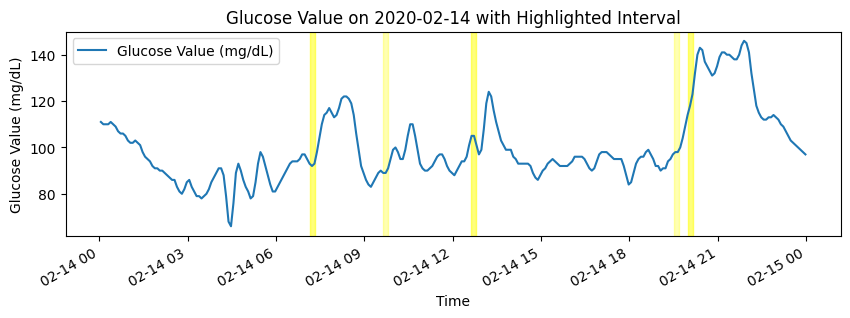

In [19]:
# 날짜 필터링
filtered_df = dexcom001_df[(dexcom001_df['datetime'] >= '2020-02-14 00:00:00') & (dexcom001_df['datetime'] <= '2020-02-14 23:59:59')]

# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(fl001_df)):
    start_time = pd.Timestamp(fl001_df.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)

# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-02-14 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

In [101]:
dexcom001_df.set_index('datetime', inplace=True)
dexcom_resampled = dexcom001_df.resample('5T')['Glucose Value (mg/dL)'].mean().interpolate()

# 지난 24시간의 데이터에 대해 개인화된 평균 및 표준 편차 계산
window = 24 * 12  # 24시간을 5분 단위로 환산
dexcom001_df['PersonalMean'] = dexcom001_df['Glucose Value (mg/dL)'].rolling(window=window, min_periods=1).mean()
dexcom001_df['PersonalStd'] = dexcom001_df['Glucose Value (mg/dL)'].rolling(window=window, min_periods=1).std()

# PersHigh, PersLow, PersNorm 분류 함수 업데이트
def classify_glucose(value, mean, std):
    if value > mean + std:
        return 'PersHigh'
    elif value < mean - std:
        return 'PersLow'
    else:
        return 'PersNorm'

# 각 측정값을 PersHigh, PersLow, PersNorm으로 분류
dexcom001_df['class'] = dexcom001_df.apply(lambda x: classify_glucose(x['Glucose Value (mg/dL)'], x['PersonalMean'], x['PersonalStd']), axis=1)


C:\Users\smyie\AppData\Local\Temp\ipykernel_6964\3161243059.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dexcom_resampled = dexcom001_df.resample('5T')['Glucose Value (mg/dL)'].mean().interpolate()


In [102]:
dexcom001_df.head(30)

,Index,Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),PersonalMean,PersonalStd,class
datetime,,,,,,,,,,,,,,,
2020-02-13 17:23:32,13,EGV,NaN,NaN,NaN,iPhone G6,61.0,NaN,NaN,NaN,NaN,11101.0,61.000000,NaN,PersNorm
2020-02-13 17:28:32,14,EGV,NaN,NaN,NaN,iPhone G6,59.0,NaN,NaN,NaN,NaN,11401.0,60.000000,1.414214,PersNorm
2020-02-13 17:33:32,15,EGV,NaN,NaN,NaN,iPhone G6,58.0,NaN,NaN,NaN,NaN,11701.0,59.333333,1.527525,PersNorm
2020-02-13 17:38:32,16,EGV,NaN,NaN,NaN,iPhone G6,59.0,NaN,NaN,NaN,NaN,12001.0,59.250000,1.258306,PersNorm
2020-02-13 17:43:31,17,EGV,NaN,NaN,NaN,iPhone G6,63.0,NaN,NaN,NaN,NaN,12301.0,60.000000,2.000000,PersHigh
2020-02-13 17:48:31,18,EGV,NaN,NaN,NaN,iPhone G6,67.0,NaN,NaN,NaN,NaN,12601.0,61.166667,3.371449,PersHigh
2020-02-13 17:53:31,19,EGV,NaN,NaN,NaN,iPhone G6,68.0,NaN,NaN,NaN,NaN,12901.0,62.142857,4.017817,PersHigh
2020-02-13 17:58:31,20,EGV,NaN,NaN,NaN,iPhone G6,63.0,NaN,NaN,NaN,NaN,13201.0,62.250000,3.732100,PersNorm
2020-02-13 18:03:32,21,EGV,NaN,NaN,NaN,iPhone G6,59.0,NaN,NaN,NaN,NaN,13501.0,61.888889,3.655285,PersNorm


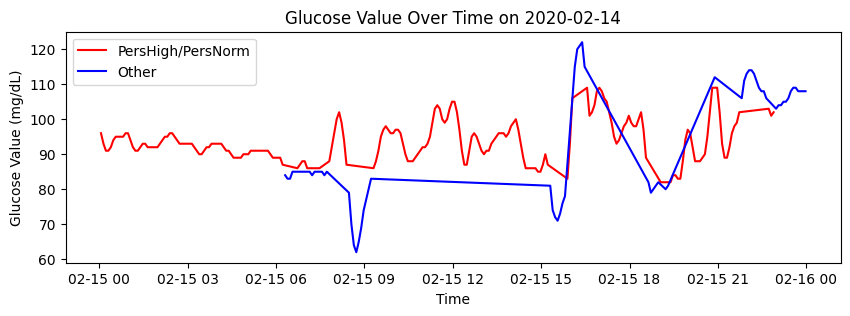

In [113]:
df_filtered = dexcom001_df[(dexcom001_df.index >= '2020-02-15 00:00:00') & (dexcom001_df.index <= '2020-02-15 23:59:59')]

df_norm = df_filtered[df_filtered['class'].isin(['PersNorm'])]

# 나머지 데이터 선택
df_other = df_filtered[df_filtered['class'].isin(['PersHigh', 'PersLow'])]

# 그래프 그리기
plt.figure(figsize=(10, 3))

# 'PersHigh' 또는 'PersNorm'인 데이터 플롯
plt.plot(df_norm.index, df_norm['Glucose Value (mg/dL)'], 'r', label='PersHigh/PersNorm')

# 나머지 데이터 플롯
plt.plot(df_other.index, df_other['Glucose Value (mg/dL)'], 'b', label='Other')

# 그래프 제목 및 레이블
plt.title('Glucose Value Over Time on 2020-02-14')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')
plt.legend()

<Axes: >

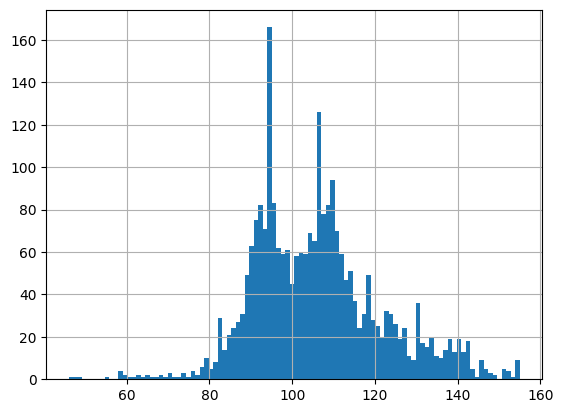

In [116]:
dexcom001_df['Glucose Value (mg/dL)'].hist(bins=100)

## ACC

In [9]:
acc001_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/001/ACC_001.csv')

In [10]:
acc001_df.head()

,datetime,acc_x,acc_y,acc_z
0,2020-02-13 15:28:50.000000,-34.0,17.0,55.0
1,2020-02-13 15:28:50.031250,-34.0,17.0,52.0
2,2020-02-13 15:28:50.062500,-34.0,19.0,51.0
3,2020-02-13 15:28:50.093750,-36.0,18.0,51.0
4,2020-02-13 15:28:50.125000,-35.0,17.0,52.0


In [11]:
acc001_df['datetime']=pd.to_datetime(acc001_df['datetime'])

In [12]:
acc_resampled = acc001_df[(acc001_df['datetime'] >= '2020-02-14 00:00:00') & (acc001_df['datetime'] <= '2020-02-14 23:59:59')].set_index('datetime').resample('5Min').first()

<Axes: xlabel='datetime'>

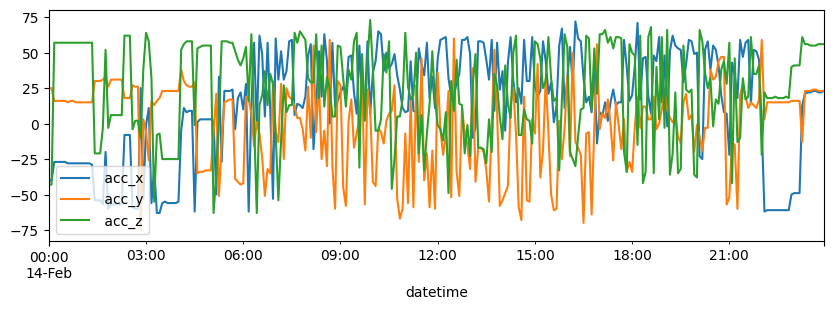

In [13]:
acc_resampled.plot(y=[' acc_x', ' acc_y', ' acc_z'], figsize=(10,3))

In [14]:
acc_mean = acc_resampled.mean()
acc_std = acc_resampled.std()
acc_min = acc_resampled.min()
acc_max = acc_resampled.max()
acc_q1g = acc_resampled.quantile(0.25)
acc_q3g = acc_resampled.quantile(0.75)
acc_skew = acc_resampled.skew()

In [15]:
print(f'acc_mean : {acc_mean}')
print(f'acc_std : {acc_std}')
print(f'acc_min : {acc_min}')
print(f'acc_max : {acc_max}')
print(f'acc_q1g : {acc_q1g}')
print(f'acc_q3g : {acc_q3g}')
print(f'acc_skew : {acc_skew}')

acc_mean :  acc_x    13.138889
 acc_y    -0.472222
 acc_z    22.927083
dtype: float64
acc_std :  acc_x    38.123970
 acc_y    29.569842
 acc_z    33.008576
dtype: float64
acc_min :  acc_x   -63.0
 acc_y   -75.0
 acc_z   -63.0
dtype: float64
acc_max :  acc_x    72.0
 acc_y    60.0
 acc_z    73.0
dtype: float64
acc_q1g :  acc_x    -5.0
 acc_y   -19.0
 acc_z    -1.0
Name: 0.25, dtype: float64
acc_q3g :  acc_x    45.25
 acc_y    21.00
 acc_z    55.25
Name: 0.75, dtype: float64
acc_skew :  acc_x   -0.629853
 acc_y   -0.562086
 acc_z   -0.488216
dtype: float64


## EDA

In [16]:
eda001_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/001/EDA_001.csv')

In [17]:
eda001_df.head()

,datetime,eda
0,2020-02-13 15:28:50.000,0.000000
1,2020-02-13 15:28:50.250,0.001281
2,2020-02-13 15:28:50.500,0.026905
3,2020-02-13 15:28:50.750,0.028186
4,2020-02-13 15:28:51.000,0.029467


In [18]:
eda001_df['datetime']=pd.to_datetime(eda001_df['datetime'])

In [19]:
eda_resampled = eda001_df[(eda001_df['datetime'] >= '2020-02-14 00:00:00') & (eda001_df['datetime'] <= '2020-02-14 23:59:59')].set_index('datetime').resample('5Min').first()

<Axes: xlabel='datetime'>

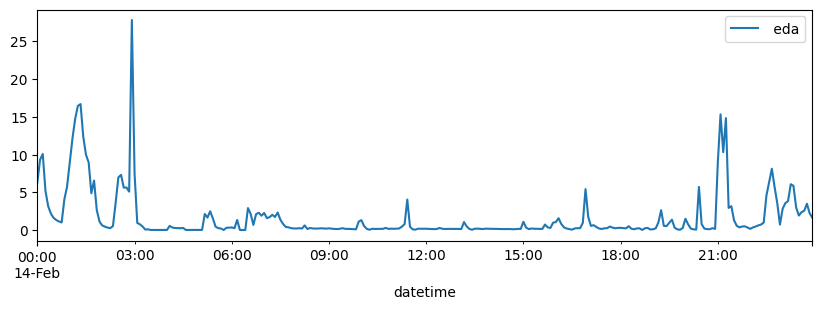

In [20]:
eda_resampled.plot(y=' eda', figsize=(10,3))

In [21]:
eda_mean = eda_resampled[' eda'].mean()
eda_std = eda_resampled[' eda'].std()
eda_min = eda_resampled[' eda'].min()
eda_max = eda_resampled[' eda'].max()
eda_q1g = eda_resampled[' eda'].quantile(0.25)
eda_q3g = eda_resampled[' eda'].quantile(0.75)
eda_skew = eda_resampled[' eda'].skew()

In [22]:
print(f'eda_mean : {eda_mean}')
print(f'eda_std : {eda_std}')
print(f'eda_min : {eda_min}')
print(f'eda_max : {eda_max}')
print(f'eda_q1g : {eda_q1g}')
print(f'eda_q3g : {eda_q3g}')
print(f'eda_skew : {eda_skew}')

eda_mean : 1.6719155729166668
eda_std : 3.3140254377832212
eda_min : 0.019218
eda_max : 27.837559
eda_q1g : 0.1727055
eda_q3g : 1.52700675
eda_skew : 3.734634262316951


In [98]:
# peak detection
peaks_idx, properties = find_peaks(eda_resampled[' eda'], height=0, distance=4, prominence=0.3)

In [101]:
peak_eda = len(peaks_idx)

In [114]:
# rolling window에서 피크를 찾는 함수
def find_peaks_in_rolling_window(data, window_size):
    number_of_windows = 0
    peaks_in_window = 0
    for window_data in data.rolling(window=window_size):
        peaks, _ = find_peaks(window_data[' eda'], height=0, distance=4, prominence=0.3)
        if peaks.any():
            peaks_in_window += len(peaks)
        number_of_windows += 1
    return number_of_windows, peaks_in_window

number_of_windows, peaks_in_window = find_peaks_in_rolling_window(eda_resampled, window_size='2H')

peakEDA2hr_sum = peaks_in_window
peakEDA2hr_mean = peaks_in_window / number_of_windows

In [115]:
print(f'PeakEDA : {peak_eda}')
print(f'PeakEDA2hr_sum : {peakEDA2hr_sum}')
print(f'PeakEDA2hr_mean : {peakEDA2hr_mean}')

PeakEDA : 28
PeakEDA2hr_sum : 565
PeakEDA2hr_mean : 1.9618055555555556


## BVP

In [23]:
bvp001_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/001/BVP_001.csv')

In [24]:
bvp001_df.head()

,datetime,bvp
0,2020-02-13 15:28:50.000000,-0.0
1,2020-02-13 15:28:50.015625,-0.0
2,2020-02-13 15:28:50.031250,-0.0
3,2020-02-13 15:28:50.046875,-0.0
4,2020-02-13 15:28:50.062500,-0.0


In [25]:
bvp001_df['datetime']=pd.to_datetime(bvp001_df['datetime'])

In [26]:
bvp_resampled = bvp001_df[(bvp001_df['datetime'] >= '2020-02-14 00:00:00') & (bvp001_df['datetime'] <= '2020-02-14 23:59:59')].set_index('datetime').resample('5Min').first()

<Axes: xlabel='datetime'>

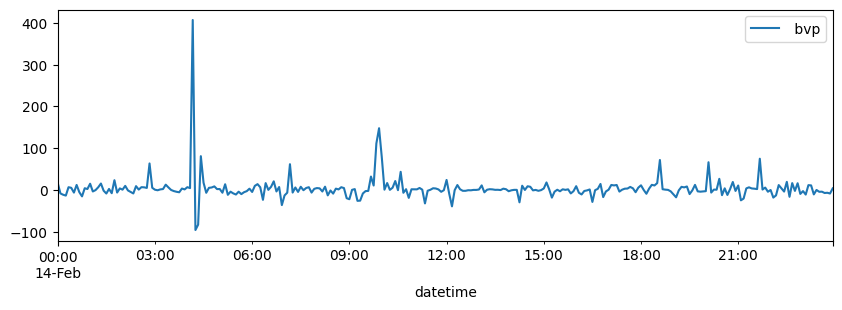

In [27]:
bvp_resampled.plot(y=' bvp', figsize=(10,3))

## HR

In [28]:
hr001_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/001/HR_001.csv')

In [29]:
hr001_df.head()

,datetime,hr
0,2/13/20 15:29,94.0
1,2/13/20 15:29,99.0
2,2/13/20 15:29,94.0
3,2/13/20 15:29,82.5
4,2/13/20 15:29,82.6


In [30]:
hr001_df['datetime']=pd.to_datetime(hr001_df['datetime'], format='%m/%d/%y %H:%M')

In [31]:
hr_resampled = hr001_df[(hr001_df['datetime'] >= '2020-02-14 00:00:00') & (hr001_df['datetime'] <= '2020-02-14 23:59:59')].set_index('datetime').resample('5Min').first()

In [32]:
hr_resampled.head()

,hr
datetime,
2020-02-14 00:00:00,68.65
2020-02-14 00:05:00,67.55
2020-02-14 00:10:00,59.60
2020-02-14 00:15:00,58.73
2020-02-14 00:20:00,55.48


<Axes: xlabel='datetime'>

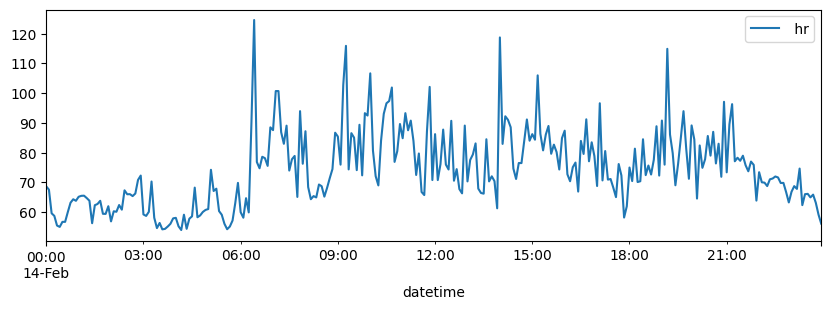

In [33]:
hr_resampled.plot(y=' hr', figsize=(10,3))

In [34]:
hr_mean = hr_resampled[' hr'].mean()
hr_std = hr_resampled[' hr'].std()
hr_min = hr_resampled[' hr'].min()
hr_max = hr_resampled[' hr'].max()
hr_q1g = hr_resampled[' hr'].quantile(0.25)
hr_q3g = hr_resampled[' hr'].quantile(0.75)
hr_skew = hr_resampled[' hr'].skew()

In [35]:
print(f'hr_mean : {hr_mean}')
print(f'hr_std : {hr_std}')
print(f'hr_min : {hr_min}')
print(f'hr_max : {hr_max}')
print(f'hr_q1g : {hr_q1g}')
print(f'hr_q3g : {hr_q3g}')
print(f'hr_skew : {hr_skew}')

hr_mean : 74.21739583333334
hr_std : 12.773160169700324
hr_min : 53.98
hr_max : 124.55
hr_q1g : 65.0825
hr_q3g : 83.005
hr_skew : 0.7961777945916989


## IBI

In [36]:
ibi001_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/001/IBI_001.csv')

In [37]:
ibi001_df.head()

,datetime,ibi
0,2020-02-13 15:33:22.059328,0.828163
1,2020-02-13 15:33:22.934368,0.875040
2,2020-02-13 15:34:21.593303,0.984420
3,2020-02-13 15:34:22.483969,0.890666
4,2020-02-13 15:34:23.421512,0.937543


In [38]:
ibi001_df['datetime']=pd.to_datetime(ibi001_df['datetime'])

5분 간격 resampling할 때, NaN을 보간하여 채우기 위해 interpolate 보정해줌

In [39]:
ibi_resampled = ibi001_df[(ibi001_df['datetime'] >= '2020-02-14 00:00:00') & (ibi001_df['datetime'] <= '2020-02-14 23:59:59')].set_index('datetime').resample('5Min').first().interpolate(method='time')

In [40]:
ibi_resampled.isna().sum()

 ibi    0
dtype: int64

In [41]:
ibi_resampled[' ibi'] = ibi_resampled[' ibi'] * 1000 # 0.xx 초 -> 밀리초 단위로

In [42]:
ibi_resampled.head()

,ibi
datetime,
2020-02-14 00:00:00,875.040
2020-02-14 00:05:00,843.789
2020-02-14 00:10:00,968.794
2020-02-14 00:15:00,1156.303
2020-02-14 00:20:00,953.169


<Axes: xlabel='datetime'>

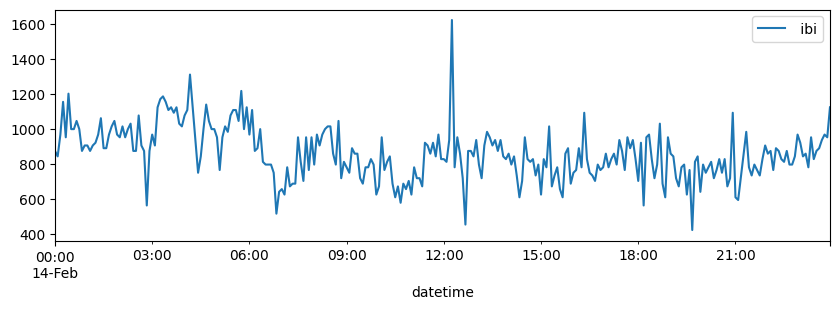

In [43]:
ibi_resampled.plot(y=' ibi', figsize=(10,3))

In [44]:
maxHRV = ibi_resampled[' ibi'].max()
minHRV = ibi_resampled[' ibi'].min()
medianHRV = ibi_resampled[' ibi'].median()
meanHRV = ibi_resampled[' ibi'].mean()
sdnn = ibi_resampled[' ibi'].std()

nn50 = 0.
for i in range(len(ibi_resampled)-1):
    if np.abs(ibi_resampled.iloc[i+1][' ibi'] - ibi_resampled.iloc[i][' ibi']) > 50:
        nn50 +=1

pnn50 = nn50/len(ibi_resampled)

rmssd = 0.
for i in range(len(ibi_resampled)-1):
    rmssd = np.abs(ibi_resampled.iloc[i+1][' ibi'] - ibi_resampled.iloc[i][' ibi'])**2
rmssd = np.sqrt(rmssd) / len(ibi_resampled)

In [45]:
print(f'maxHRV : {maxHRV}')
print(f'minHRV : {minHRV}')
print(f'medianHRV : {medianHRV}')
print(f'meanHRV : {meanHRV}')
print(f'SDNN : {sdnn}')
print(f'NN50 : {nn50}')
print(f'pNN50 : {pnn50}')
print(f'RMSSD : {rmssd}')

maxHRV : 1625.0739999999998
minHRV : 421.8939999999999
medianHRV : 856.8098333333332
meanHRV : 861.4760243055555
SDNN : 150.723369258299
NN50 : 173.0
pNN50 : 0.6006944444444444
RMSSD : 0.5968124999999994


## TEMP

In [46]:
temp001_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/001/TEMP_001.csv')

In [47]:
temp001_df.head()

,datetime,temp
0,2020-02-13 15:28:50.000,30.21
1,2020-02-13 15:28:50.250,30.21
2,2020-02-13 15:28:50.500,30.21
3,2020-02-13 15:28:50.750,30.21
4,2020-02-13 15:28:51.000,30.21


In [48]:
temp001_df['datetime']=pd.to_datetime(temp001_df['datetime'])

In [49]:
temp_resampled = temp001_df[(temp001_df['datetime'] >= '2020-02-14 00:00:00') & (temp001_df['datetime'] <= '2020-02-14 23:59:59')].set_index('datetime').resample('5Min').first()

<Axes: xlabel='datetime'>

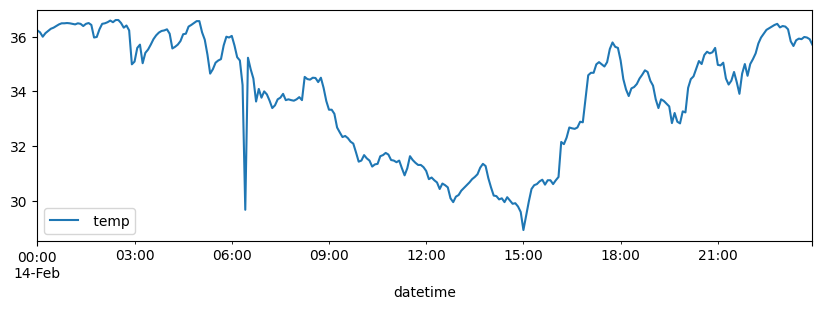

In [50]:
temp_resampled.plot(y=' temp', figsize=(10,3))

In [51]:
temp_mean = temp_resampled[' temp'].mean()
temp_std = temp_resampled[' temp'].std()
temp_min = temp_resampled[' temp'].min()
temp_max = temp_resampled[' temp'].max()
temp_q1g = temp_resampled[' temp'].quantile(0.25)
temp_q3g = temp_resampled[' temp'].quantile(0.75)
temp_skew = temp_resampled[' temp'].skew()

In [52]:
print(f'temp_mean : {temp_mean}')
print(f'temp_std : {temp_std}')
print(f'temp_min : {temp_min}')
print(f'temp_max : {temp_max}')
print(f'temp_q1g : {temp_q1g}')
print(f'temp_q3g : {temp_q3g}')
print(f'temp_skew : {temp_skew}')

temp_mean : 33.847951388888895
temp_std : 2.170633179929283
temp_min : 28.93
temp_max : 36.61
temp_q1g : 31.66
temp_q3g : 35.832499999999996
temp_skew : -0.46255126682033076
